In [297]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from decimal import Decimal

In [298]:
# Read data
df_calendar = pd.read_csv('./data/calendar.csv')
df_reviews = pd.read_csv('./data/reviews.csv')
df_listings = pd.read_csv('./data/listings.csv')

In [299]:
# 1. Business understanding
# The goal is to offer insights into the Boston short-term rental market which will benefit stakeholders including city planners, owners, travelers and policymakers.

In [300]:
# 2. Data Understanding
# A general overview and analysis of the data provided in the spreadsheets.

In [301]:
# Calendar CSV

In [302]:
print(df_calendar.shape)
pd.concat([df_calendar.head(), df_calendar.tail()])

(1308890, 4)


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN
1308889,14504422,2016-09-06,f,NaN


In [303]:
df_calendar[df_calendar['price'].notnull()].head()

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00


In [304]:
df_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [305]:
# Notes: The calendar spreadsheet appears to keep a running record of the dates each listing was available and the price they were listed for.

In [306]:
# Reviews CSV

In [307]:
print(df_reviews.shape)
pd.concat([df_reviews.head(), df_reviews.tail()])

(68275, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...
68274,7462268,98550693,2016-08-31,90128094,Arianna,The room itself and the aprtment were very cle...


In [308]:
df_reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [309]:
# Notes: The reviews spreadsheet contains metadata for each review per listing (reviewer_name, date, comments, etc)

In [310]:
# Listings CSV

In [311]:
print(df_listings.shape)
df_listings.head()

(3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [312]:
df_listings.info(verbose=True)
df_listings.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 95, dtype: object

In [313]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [314]:
# Notes: listings contains aggregated information, including host info, listing descriptions, property types and review scores. 

In [315]:
# Iteration: Business Understanding
# Now that I've reviewed the data available, I'd like to pose three questions regarding this information...
# 1). In what timeframes do rental prices spike the most?
# 2). Are travelers generally satisfied with the accommodations in Boston and what areas/neighborhoods are the most popular?
# 3). Is the amount of short-term rental bookings increasing or declining?

In [316]:
# With these questions in mind we can ignore the reviews spreadsheet since the majority of the information that is needed
# Is either in the calendar or listings CSV's.

In [317]:
# 3. Data Preperation

In [318]:
# Check for rows missing all data
calendar_missing_count = len((df_calendar[df_calendar.isna().all(axis=1)]))
listings_missing_count = len((df_listings[df_listings.isna().all(axis=1)]))

calendar_missing_count, listings_missing_count

(0, 0)

In [319]:
# Check for duplicates
cal_duplicates = df_calendar.duplicated()
listings_duplicates = df_listings.duplicated()

cal_duplicates.sum(), listings_duplicates.sum()

(365, 0)

In [320]:
# Check duplicates
# leave the original in place for now
duplicated_rows = df_calendar[cal_duplicates]
duplicated_rows # The rows returned aren't duplicates, don't drop these.

,listing_id,date,available,price
748468,12898806,2017-06-15,f,NaN
748469,12898806,2017-06-14,f,NaN
748470,12898806,2017-06-13,f,NaN
748471,12898806,2017-06-12,f,NaN
748472,12898806,2017-06-11,f,NaN
...,...,...,...,...
748975,12898806,2016-12-17,f,NaN
748976,12898806,2016-12-16,f,NaN
748977,12898806,2016-12-15,f,NaN
748978,12898806,2016-12-14,f,NaN


In [321]:
# Find columns where values are all the same
# From the previous evaluation the reviews and calendar CSV's look okay but we'll take a closer look at the listings file
df_listings.info(verbose=True)
df_listings.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [322]:
all_same_values = df_listings.apply(lambda x: x.nunique() == 1)

for column, result in all_same_values.items():
    if result:
        print(f"All values in column '{column}' are the same.")

All values in column 'scrape_id' are the same.
All values in column 'last_scraped' are the same.
All values in column 'experiences_offered' are the same.
All values in column 'state' are the same.
All values in column 'country_code' are the same.
All values in column 'country' are the same.
All values in column 'calendar_last_scraped' are the same.
All values in column 'requires_license' are the same.


In [323]:
columns_to_drop = (all_same_values[all_same_values == True]).index
columns_to_drop

Index(['scrape_id', 'last_scraped', 'experiences_offered', 'state',
       'country_code', 'country', 'calendar_last_scraped', 'requires_license'],
      dtype='object')

In [324]:
# The columns listed above can be safely dropped
original_col_count = df_listings.shape[1]
df_listings.drop(columns=columns_to_drop, inplace=True)
print('Columns dropped: ', original_col_count - df_listings.shape[1])

Columns dropped:  8


In [325]:
# Drop columns that aren't relevant

In [326]:
# 1). In what timeframes do rental prices spike the most?
    # - Most of this can be derived from the calendar CSV, we'll keep all the columns from this CSV
df_calendar.columns.tolist()

['listing_id', 'date', 'available', 'price']

In [327]:
# 2). Are travelers generally satisfied with the accommodations in Boston and what areas/neighborhoods are the most popular?
# Can be derived from the listings CSV
# Columns needed:
     # 'street',
     # 'neighbourhood',
     # 'price',
     # 'number_of_reviews',
     # 'review_scores_rating',
     # 'review_scores_accuracy',
     # 'review_scores_cleanliness',
     # 'review_scores_checkin',
     # 'review_scores_communication',
     # 'review_scores_location',
     # 'review_scores_value',
     # 'reviews_per_month',

In [328]:
# 3). Is the amount of short-term rental bookings increasing or declining?
    # - This can be derived from the listings CSV data # of reviews per month with the columns above

In [329]:
# Create a new subset of columns needed from the listings CSV
print(df_listings.shape)
columns_to_keep = [
     'id',
     'street',
     'neighbourhood',
     'price',
     'number_of_reviews',
     'review_scores_rating',
     'review_scores_accuracy',
     'review_scores_cleanliness',
     'review_scores_checkin',
     'review_scores_communication',
     'review_scores_location',
     'review_scores_value',
     'reviews_per_month'
]
df_listings_subset = df_listings[columns_to_keep]
df_listings_subset.shape

(3585, 87)


(3585, 13)

In [330]:
df_listings_subset.head()

,id,street,neighbourhood,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,12147973,"Birch Street, Boston, MA 02131, United States",Roslindale,$250.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,$65.00,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1.30
2,6976,"Ardale St., Boston, MA 02131, United States",Roslindale,$65.00,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0.47
3,1436513,"Boston, MA, United States",NaN,$75.00,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00
4,7651065,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,$79.00,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,2.25


In [331]:
# Drop the listings that don't have any reviews
print(df_listings_subset.shape)
df_listings_dropped_low_reviews = df_listings_subset[df_listings_subset['number_of_reviews'] > 0]
df_listings_dropped_low_reviews.shape

(3585, 13)


(2829, 13)

In [332]:
df_listings_dropped_low_reviews.head()

,id,street,neighbourhood,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
1,3075044,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,$65.00,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1.30
2,6976,"Ardale St., Boston, MA 02131, United States",Roslindale,$65.00,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0.47
3,1436513,"Boston, MA, United States",NaN,$75.00,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00
4,7651065,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,$79.00,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,2.25
5,12386020,"Walter Street, Boston, MA 02131, United States",Roslindale,$75.00,8,100.0,10.0,10.0,10.0,10.0,9.0,10.0,1.70


In [333]:
# Check the listings columns for missing data
df_listings_dropped_low_reviews.isna().mean().round(4) * 100

id                              0.00
street                          0.00
neighbourhood                  14.53
price                           0.00
number_of_reviews               0.00
review_scores_rating            2.01
review_scores_accuracy          2.37
review_scores_cleanliness       2.19
review_scores_checkin           2.26
review_scores_communication     2.19
review_scores_location          2.33
review_scores_value             2.30
reviews_per_month               0.00
dtype: float64

In [334]:
# Drop the rows with missing neighbourhoods. These values are important for question 2.
df_listings_cleaned = df_listings_dropped_low_reviews.dropna(subset=['neighbourhood'])

In [335]:
# Check again
df_listings_cleaned.isna().mean().round(4) * 100
df_listings_cleaned.shape

(2418, 13)

In [336]:
# Check the calendar columns for missing data
df_calendar.isna().mean().round(4) * 100

listing_id     0.00
date           0.00
available      0.00
price         50.87
dtype: float64

In [337]:
df_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [338]:
# Drop the NaN values from calendar
print(df_calendar.shape)
df_calender_drop_nan = df_calendar[df_calendar['price'].isna() == False]
df_calender_drop_nan.shape

(1308890, 4)


(643037, 4)

In [339]:
df_calender_drop_nan.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [340]:
# Convert the date to a datetime
df_calender_drop_nan['date'] = pd.to_datetime(df_calender_drop_nan['date'])
df_calender_drop_nan.dtypes

C:\Users\tmcin\AppData\Local\Temp\ipykernel_3776\458784854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calender_drop_nan['date'] = pd.to_datetime(df_calender_drop_nan['date'])


listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [341]:
# Convert the price to a decimal
def convert_to_decimal(price_str):
    cleaned_price_str = price_str.replace('$', '').replace(',', '')
    return Decimal(cleaned_price_str)

df_calender_drop_nan.loc[:, 'price'] = df_calender_drop_nan['price'].apply(convert_to_decimal)

In [342]:
df_calender_drop_nan.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [343]:
# Extract the month from the 'date' column
df_calender_drop_nan['month'] = df_calender_drop_nan['date'].dt.to_period('M')
df_calendar_with_month = df_calender_drop_nan.copy()

C:\Users\tmcin\AppData\Local\Temp\ipykernel_3776\3018868840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calender_drop_nan['month'] = df_calender_drop_nan['date'].dt.to_period('M')


In [344]:
cal_cols_to_keep = ['listing_id', 'price', 'month']
df_calendar_cleaned = df_calendar_with_month[cal_cols_to_keep]

In [345]:
df_calendar_cleaned.head()

,listing_id,price,month
365,3075044,65.00,2017-08
366,3075044,65.00,2017-08
367,3075044,65.00,2017-08
368,3075044,75.00,2017-08
369,3075044,75.00,2017-08


In [346]:
# Modeling

In [347]:
# What timeframes/windows do prices spike the most?
# Find the average price per listing
df_calendar_grouped = df_calendar_cleaned.groupby(['listing_id', 'month'])['price'].mean().reset_index()

In [348]:
# Find the average price per month
df_grouped_month_price = df_calendar_grouped.groupby(['month'])['price'].mean().reset_index()
df_grouped_month_price.head()

,month,price
0,2016-09,214.863927
1,2016-10,217.245658
2,2016-11,198.152463
3,2016-12,185.214545
4,2017-01,183.296738


C:\Users\tmcin\AppData\Local\Temp\ipykernel_3776\2366374142.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.loc[:, 'price'] = merged_df['price'].fillna(average_price_overall)


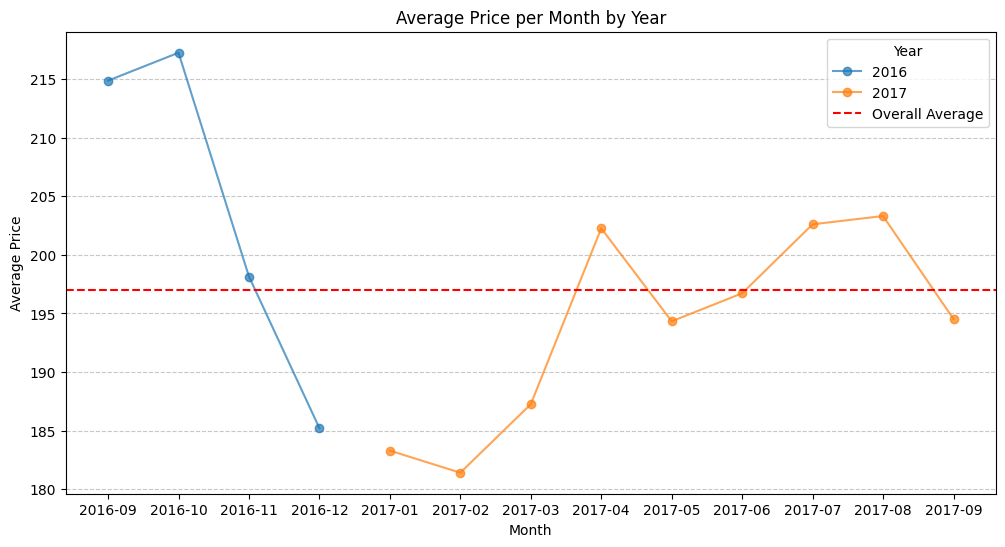

In [349]:
df_grouped_month_price['month'] = pd.to_datetime(df_grouped_month_price['month'].astype(str)).dt.to_period('M')
df_grouped_month_price['year'] = df_grouped_month_price['month'].dt.to_timestamp().dt.year  # Extracting the year

# Create a DataFrame with all possible months in the range
all_months = pd.period_range(start=df_grouped_month_price['month'].min(), end=df_grouped_month_price['month'].max(), freq='M')
all_months_df = pd.DataFrame({'month': all_months})

# Merge with the original DataFrame to fill missing months with NaN
merged_df = pd.merge(all_months_df, df_grouped_month_price, on='month', how='left')

# Fill NaN values with the overall average
average_price_overall = df_grouped_month_price['price'].mean()
merged_df.loc[:, 'price'] = merged_df['price'].fillna(average_price_overall)

# Convert 'month' to string representation
merged_df['month_str'] = merged_df['month'].astype(str)

# Plotting as a line graph with dots (markers) for each year
plt.figure(figsize=(12, 6))
for year in merged_df['year'].unique():
    data_year = merged_df[merged_df['year'] == year]
    plt.plot(data_year['month_str'], data_year['price'], marker='o', label=str(year), alpha=0.7)

# Plotting the overall average price as a horizontal line
plt.axhline(y=average_price_overall, color='r', linestyle='--', label='Overall Average')

plt.title('Average Price per Month by Year')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [350]:
# Findings for questions 1
# Q: In what months do rental prices spike the most?
# From this graph we can see that the price spikes above the average in the spring and late summer months.
# Additionally we can see that prices plummet in winter months between November and April.
# Additionally this graph suggests that prices and demand for short term rentals may have been much higher in late 2016 than 2017

In [351]:
# 2). Are travelers generally satisfied with the accommodations in Boston and what areas/neighborhoods are the most popular?

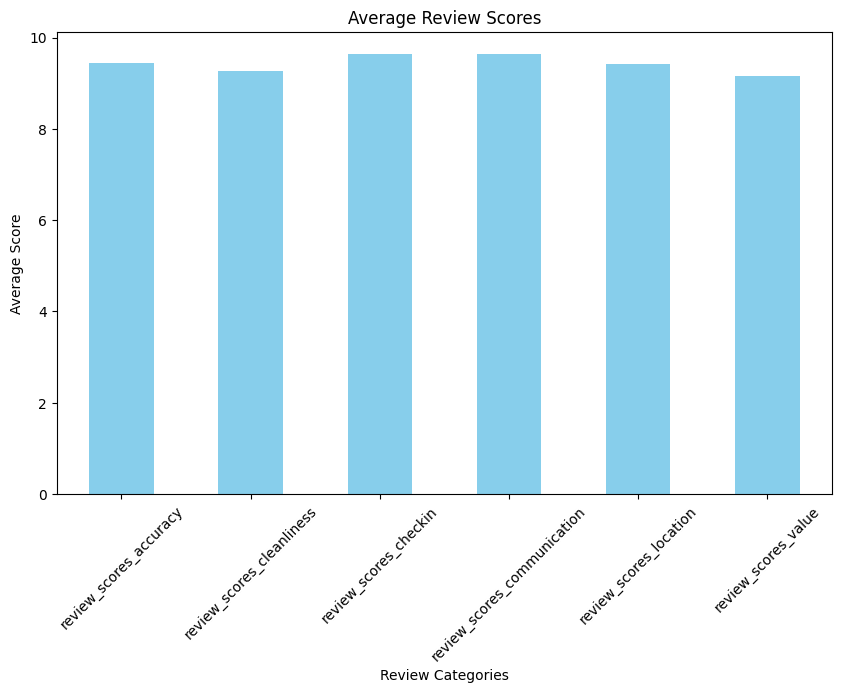

In [352]:
# Calculate the mean for each column
average_scores = df_listings_cleaned[['review_scores_accuracy', 'review_scores_cleanliness',
                                      'review_scores_checkin', 'review_scores_communication',
                                      'review_scores_location', 'review_scores_value']].mean()

# Plot the average scores
plt.figure(figsize=(10, 6))
average_scores.plot(kind='bar', color='skyblue')
plt.title('Average Review Scores')
plt.xlabel('Review Categories')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

In [353]:
# Q: Are travelers generally satisfied with the accommodations in Boston?
# This graph suggests that reviewers are highly satisfied with their short term rentals across all review scores

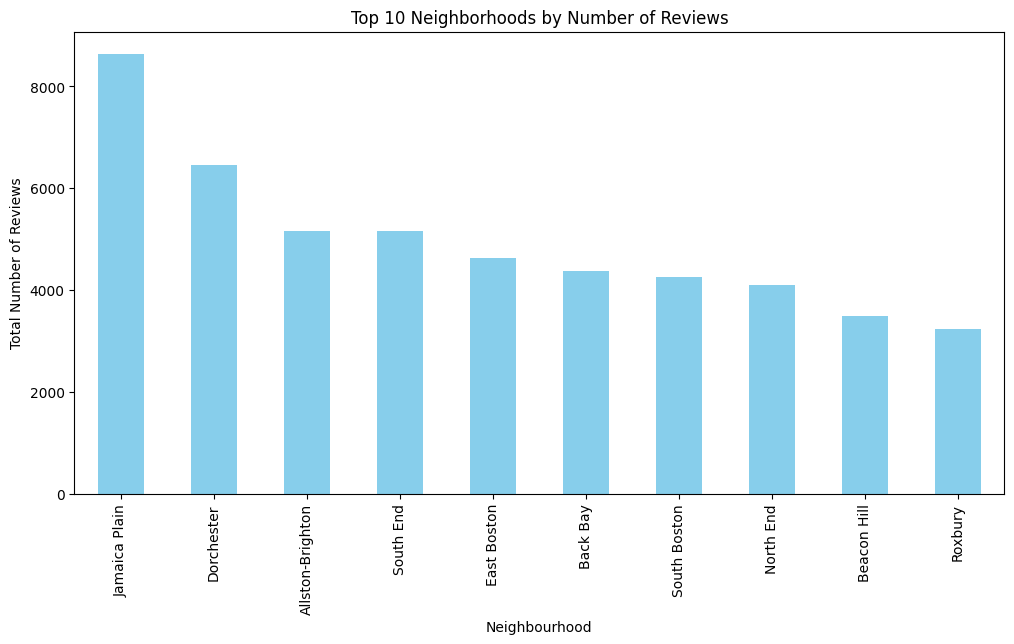

In [354]:
# Group by 'neighbourhood' and sum the 'number_of_reviews'
neighborhood_reviews = df_listings_cleaned.groupby('neighbourhood')['number_of_reviews'].sum()

# Sort in descending order
neighborhood_reviews = neighborhood_reviews.sort_values(ascending=False)

# Select the top 10 neighborhoods
top_neighborhoods = neighborhood_reviews.head(10)

# Plot the results
plt.figure(figsize=(12, 6))
top_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods by Number of Reviews')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Number of Reviews')
plt.show()

In [355]:
# Q: What neighborhoods are the most popular?
# The Jamacia Plain, and Dorchester neighbourhoods receiving the most reviews. 
# Additionally Allston-Brighton and South End neighbourhoods are frequently booked as well.

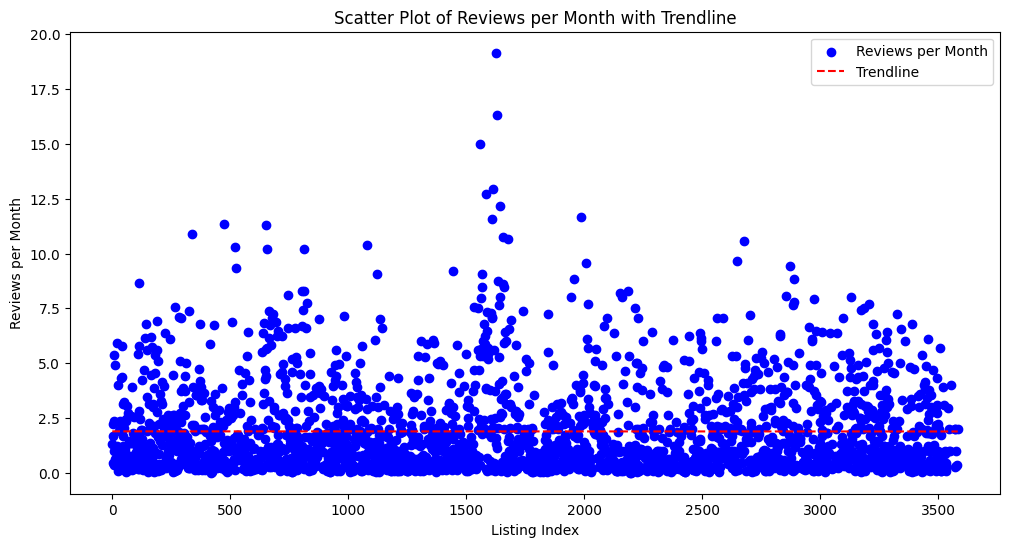

slope: -1.3167699735090827e-06
The number of reviews is declining per month.


In [356]:
# Calculate the linear regression line
coefficients = np.polyfit(df_listings_cleaned.index, df_listings_cleaned['reviews_per_month'], 1)
trendline = np.polyval(coefficients, df_listings_cleaned.index)

# Plot the scatter plot with the trendline
plt.figure(figsize=(12, 6))
plt.scatter(df_listings_cleaned.index, df_listings_cleaned['reviews_per_month'], color='blue', label='Reviews per Month', marker='o')
plt.plot(df_listings_cleaned.index, trendline, linestyle='--', color='red', label='Trendline')
plt.title('Scatter Plot of Reviews per Month with Trendline')
plt.xlabel('Listing Index')
plt.ylabel('Reviews per Month')
plt.legend()
plt.show()

# Analyze the slope of the trendline
slope = coefficients[0]
print('slope:', slope)
# Determine if the number of reviews is declining
if slope < 0:
    print("The number of reviews is declining per month.")
elif slope > 0:
    print("The number of reviews is increasing per month.")
else:
    print("The number of reviews is constant.")

In [357]:
# Q: Is the amount of short-term rental bookings increasing or declining?
# The slope shows that the number of reviews per month is trending downward gradually between

In [358]:
# Question 4
# What is the average price of these neighbourhoods?

C:\Users\tmcin\AppData\Local\Temp\ipykernel_3776\2844476478.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_cleaned['price_as_decimal'] = df_listings_cleaned['price'].apply(convert_to_decimal)


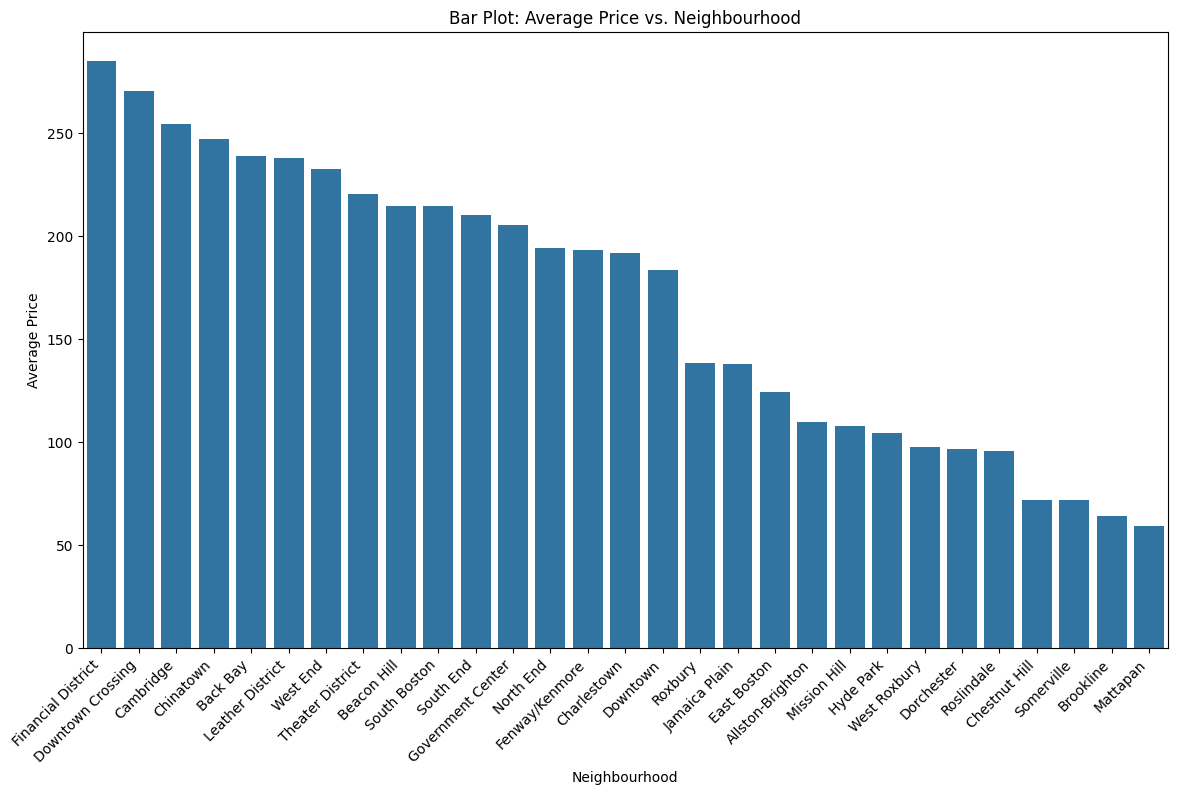

In [370]:
# Drop the missing price values
df_listings_cleaned_prices = df_listings_cleaned[df_listings_cleaned['price'].notna()]

# Convert price to a float
df_listings_cleaned['price_as_decimal'] = df_listings_cleaned['price'].apply(convert_to_decimal)

# Groupby neighbourhood and average the price
average_price_by_neighbourhood = df_listings_cleaned_prices.groupby('neighbourhood')['price_as_decimal'].mean().round(2).reset_index()

# Sort the DataFrame by 'price_as_decimal' in descending order
average_price_by_neighbourhood = average_price_by_neighbourhood.sort_values(by='price_as_decimal', ascending=False)

# Plot and show
plt.figure(figsize=(14, 8))
sns.barplot(x='neighbourhood', y='price_as_decimal', data=average_price_by_neighbourhood, order=average_price_by_neighbourhood['neighbourhood'])
plt.title('Bar Plot: Average Price vs. Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()